In [1]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def res(arr,x,y):
    zeroarray=np.zeros((1,y))
    #print(arr.shape)
    k=120-x+1
    if x<=120:
        for i in range(1,k):
            arr = np.vstack((arr,zeroarray))      #重設矩陣大小
    return arr

In [3]:
dirdata1='正手訓/'
dirdata2='反手訓/'

In [4]:
def data_all(dirdata1,dirdata2):
    data = []
    x=[]
    label=[]
    max=120
    for i in os.listdir(dirdata1):
        npy_file = (dirdata1+i)
        x=np.load(npy_file)
        #x=np.delete(x, [30,31,32,33,34,35,36,37,40,41,42,43,46,47,48,49], axis=1)
        #移除15,16,17,18,20,21,23,24點位
        a,b=x.shape
        x=res(x,a,b)
        x = np.array(x)
        data.append(x)
        label.append(0)
    for i in os.listdir(dirdata2):
        npy_file = (dirdata2+i)
        x=np.load(npy_file)
        #x=np.delete(x, [30,31,32,33,34,35,36,37,40,41,42,43,46,47,48,49], axis=1)
        a,b=x.shape
        x=res(x,a,b)
        x = np.array(x)

        data.append(x)
        label.append(1)
    
    
    data = np.array(data) # 3
    label = np.array(label) #3
    label = np.eye(2)[label]
    
    return data,label

In [5]:
def data_new(dirdata1,dirdata2):
    data = []
    x=[]
    label=[]
    max=120
    for i in os.listdir(dirdata1):
        npy_file = (dirdata1+i)
        x=np.load(npy_file)
        x=np.delete(x, [30,31,32,33,34,35,36,37,40,41,42,43,46,47,48,49], axis=1)
        #移除15,16,17,18,20,21,23,24點位
        a,b=x.shape
        x=res(x,a,b)
        x = np.array(x)
        data.append(x)
        label.append(0)
    for i in os.listdir(dirdata2):
        npy_file = (dirdata2+i)
        x=np.load(npy_file)
        x=np.delete(x, [30,31,32,33,34,35,36,37,40,41,42,43,46,47,48,49], axis=1)
        a,b=x.shape
        x=res(x,a,b)
        x = np.array(x)

        data.append(x)
        label.append(1)
    
    
    data = np.array(data) # 3
    label = np.array(label) #3
    label = np.eye(2)[label]
    
    return data,label

In [6]:
data,label=data_all(dirdata1,dirdata2)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=0.33, random_state=42)

In [9]:
data.shape

(440, 120, 50)

In [10]:
count,x,y=data.shape

In [11]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x,y)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 118, 64)           9664      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 64)           12352     
_________________________________________________________________
dropout (Dropout)            (None, 116, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 58, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3712)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               371300    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,Y_train, epochs=10, validation_split=0.2, batch_size=30, verbose=1)


Epoch 1/10
8/8 [==============================] - 0s 32ms/step - loss: 699.4298 - accuracy: 0.5617 - val_loss: 9.1935 - val_accuracy: 0.8644
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 17.3515 - accuracy: 0.9064 - val_loss: 18.2639 - val_accuracy: 0.9322
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 4.1020 - accuracy: 0.9745 - val_loss: 12.4466 - val_accuracy: 0.9322
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 2.6903 - accuracy: 0.9957 - val_loss: 0.6509 - val_accuracy: 0.9492
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 0.2998 - accuracy: 0.9915 - val_loss: 1.3842 - val_accuracy: 0.9492
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 2.8660e-07 - accuracy: 1.0000 - val_loss: 0.9450 - val_accuracy: 0.9492
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0668 - accuracy: 0.9957 - val_loss: 0.0423 - val_accuracy: 0.9831
Epoch 8/10
8/8 [========

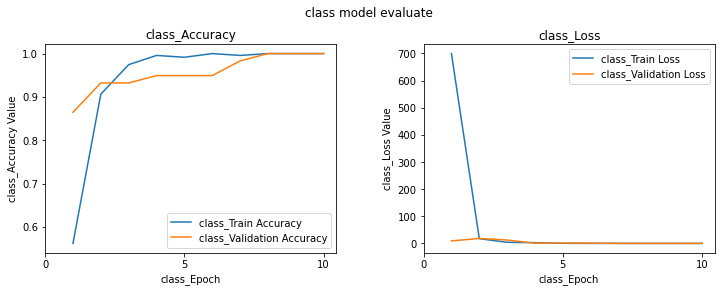

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('class model evaluate', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

class_epoch_list = list(range(1,11))
ax1.plot(class_epoch_list, history.history['accuracy'], label='class_Train Accuracy')
ax1.plot(class_epoch_list, history.history['val_accuracy'], label='class_Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 5))
ax1.set_ylabel('class_Accuracy Value')
ax1.set_xlabel('class_Epoch')
ax1.set_title('class_Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(class_epoch_list, history.history['loss'], label='class_Train Loss')
ax2.plot(class_epoch_list, history.history['val_loss'], label='class_Validation Loss')
ax2.set_xticks(np.arange(0, 11, 5))
ax2.set_ylabel('class_Loss Value')
ax2.set_xlabel('class_Epoch')
ax2.set_title('class_Loss')
l2 = ax2.legend(loc="best")

In [16]:
#model.save('1d_cnn_all.h5')

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
import keras
modello = keras.models.load_model('1d_cnn_all.h5')

In [28]:
test_dirdata1='正手測/'
test_dirdata2='反手測/'

In [29]:
test_data,test_label=data_all(test_dirdata1,test_dirdata2)

In [30]:
time_pre=modello.predict(test_data,verbose=2)

10/10 - 0s


In [31]:
test_label[:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]])

In [32]:
time_pre[:3]

array([[0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [33]:
Y_test = np.argmax(test_label,axis=1)
Y_pred = np.argmax(time_pre,axis=1)

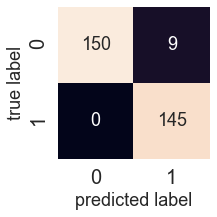

In [34]:
mat = confusion_matrix(Y_test,Y_pred)

sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel('true label')
plt.xlabel('predicted label');

In [35]:
target_names = ["forehand","backhand"]
print(classification_report(Y_test,Y_pred,target_names=target_names))

              precision    recall  f1-score   support

    forehand       1.00      0.94      0.97       159
    backhand       0.94      1.00      0.97       145

    accuracy                           0.97       304
   macro avg       0.97      0.97      0.97       304
weighted avg       0.97      0.97      0.97       304



Text(0.5, 1.0, 'Predicted label (first 100)')

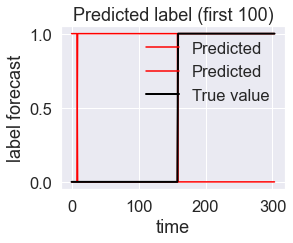

In [38]:
plt.figure(figsize=(4,3))


# plt.subplot(3,1,1)
plt.plot(time_pre[:500], color = 'red', label = 'Predicted')
plt.plot(Y_test[:500], color = 'black', linewidth=2, label = 'True value')

plt.legend(frameon=False)
plt.ylabel("label forecast")
plt.xlabel("time")
plt.title("Predicted label (first 100)")